In [1]:

from numpy import *
from matplotlib.pyplot import *
# from kuramoto import Kuramoto
import fastIsing, kuramoto
import networkx as nx

n = 200
# graph = nx.grid_2d_graph(n,n, True)
# graph = nx.path_graph(n)
graph = nx.complete_graph(n )
for i,j in graph.edges():
    graph[i][j]['weight'] =  4 / n
model = kuramoto.Kuramoto(graph)

model.dt = .05

tmp = [4, 8]
model.freq = random.normal(0, 1, model.nNodes)
model.states = random.uniform(0, 2 * pi, model.nNodes)
model.mode = 'serial'
# model.freq = random.choice(tmp, model.nNodes)
# model.freq = random.choice(tmp, model.nNodes) # random.randn(model.nNodes) *.01 + 10
N = 1000
res = model.simulate(N)
r = exp(complex(0, 1) * res).mean(-1)

fig, ax = subplots(); ax.plot(abs(r))
show()


<Figure size 640x480 with 1 Axes>

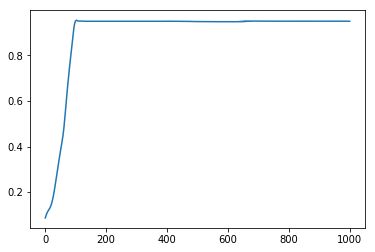

In [2]:

x = arange(N) * model.dt

# fig, ax = subplots(); ax.plot(odePhi)
# fig, ax = subplots(); ax.plot(res)
# fig, ax = subplots(3, figsize = (8, 15)); [axi.plot(x, j) for axi, j in zip(ax, odePhi.T)]
r = abs(exp(1j * res).mean(axis = 1))
fig, ax = subplots(); ax.plot(r)
show()

In [3]:
# temporar function to show the results interactive
%matplotlib notebook
from ipywidgets import interact, interactive
from ipywidgets.embed import embed_minimal_html
from IPython.display import display
import numpy as np
def disp(images):
    N = len(images)
    fig, ax = subplots()
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    h = ax.scatter(cos(images[0,:]), sin(images[0, :]))
    def view(frame = 0):
        ax.clear()
        ax.scatter(cos(images[frame]), sin(images[frame]))
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        fig.canvas.draw_idle()
    interact(view, frame = (0, N -1))
disp(res)

<IPython.core.display.Javascript object>

interactive(children=(IntSlider(value=0, description='frame', max=1000), Output()), _dom_classes=('widget-inte…

In [4]:

    
# #!/usr/bin/python
# # coding: UTF-8
# #
# # Author: Dawid Laszuk
# # Contact: laszukdawid@gmail.com
# #
# # Last update: 12/03/2017
# #
# # Feel free to contact for any information.
# #
# # You can cite this code by referencing:
# #   D. Laszuk, "Python implementation of Kuramoto systems," 2017-,
# #   [Online] Available: http://www.laszukdawid.com/codes
# #
# # LICENCE:
# # This program is free software on GNU General Public Licence version 3.
# # For details of the copyright please see: http://www.gnu.org/licenses/.

# from __future__ import print_function

# import numpy as np
# from scipy.integrate import ode

# __version__ = '0.3'
# __author__ = 'Dawid Laszuk'

# class Kuramoto(object):
#     """
#     Implementation of Kuramoto coupling model [1] with harmonic terms
#     and possible perturbation.
#     It uses NumPy and Scipy's implementation of Runge-Kutta 4(5)
#     for numerical integration.
#     Usage example:
#     >>> kuramoto = Kuramoto(initial_values)
#     >>> phase = kuramoto.solve(X)
#     [1] Kuramoto, Y. (1984). Chemical Oscillations, Waves, and Turbulence
#         (Vol. 19). doi: doi.org/10.1007/978-3-642-69689-3
#     """

#     _noises = { 'logistic': np.random.logistic,
#                 'normal': np.random.normal,
#                 'uniform': np.random.uniform,
#                 'custom': None
#               }

#     noise_types = _noises.keys()

#     def __init__(self, init_values, noise=None):
#         """
#         Passed arguments should be a dictionary with NumPy arrays
#         for initial phase (Y0), intrisic frequencies (W) and coupling
#         matrix (K).
#         """
#         self.dtype = np.float32

#         self.dt = 1.
#         self.init_phase = np.array(init_values['Y0'])
#         self.W = np.array(init_values['W'])
#         self.K = np.array(init_values['K'])

#         self.n_osc = len(self.W)
#         self.m_order = self.K.shape[0]

#         self.noise = noise


#     @property
#     def noise(self):
#         """Sets perturbations added to the system at each timestamp.
#         Noise function can be manually defined or selected from
#         predefined by assgining corresponding name. List of available
#         pertrubations is reachable through `noise_types`. """
#         return self._noise

#     @noise.setter
#     def noise(self, _noise):

#         self._noise = None
#         self.noise_params = None
#         self.noise_type = 'custom'

#         # If passed a function
#         if callable(_noise):
#             self._noise = _noise

#         # In case passing string
#         elif isinstance(_noise, str):

#             if _noise.lower() not in self.noise_types:
#                 self.noise_type = None
#                 raise NameError("No such noise method")

#             self.noise_type = _noise.lower()
#             self.update_noise_params(self.dt)

#             noise_function = self._noises[self.noise_type]
#             self._noise = lambda: np.array([noise_function(**p) for p in self.noise_params])

#     def update_noise_params(self, dt):
#         self.scale_func = lambda dt: dt/np.abs(self.W**2)
#         scale = self.scale_func(dt)

#         if self.noise_type == 'uniform':
#             self.noise_params = [{'low':-s, 'high': s} for s in scale]
#         elif self.noise_type in self.noise_types:
#             self.noise_params = [{'loc':0, 'scale': s} for s in scale]
#         else:
#             pass

#     def kuramoto_ODE(self, t, y, arg):
#         """General Kuramoto ODE of m'th harmonic order.
#            Argument `arg` = (w, k), with
#             w -- iterable frequency
#             k -- 3D coupling matrix, unless 1st order
#             """

#         w, k = arg
#         yt = y[:,None]
#         dy = y-yt
#         phase = w.astype(self.dtype)
#         if self.noise != None:
#             n = self.noise().astype(self.dtype)
#             phase += n
#         for m, _k in enumerate(k):
#             phase += np.sum(_k*np.sin((m+1)*dy),axis=1)

#         return phase

#     def kuramoto_ODE_jac(self, t, y, arg):
#         """Kuramoto's Jacobian passed for ODE solver."""

#         w, k = arg
#         yt = y[:,None]
#         dy = y-yt

#         phase = [m*k[m-1]*np.cos(m*dy) for m in range(1,1+self.m_order)]
#         phase = np.sum(phase, axis=0)

#         for i in range(self.n_osc):
#             phase[i,i] = -np.sum(phase[:,i])

#         return phase

#     def solve(self, t):
#         """Solves Kuramoto ODE for time series `t` with initial
#         parameters passed when initiated object.
#         """
#         dt = t[1]-t[0]
#         if self.dt != dt and self.noise_type != 'custom':
#             self.dt = dt
#             self.update_noise_params(dt)

#         kODE = ode(self.kuramoto_ODE, jac=self.kuramoto_ODE_jac)
#         kODE.set_integrator("dopri5")

#         # Set parameters into model
#         kODE.set_initial_value(self.init_phase, t[0])
#         kODE.set_f_params((self.W, self.K))
#         kODE.set_jac_params((self.W, self.K))

#         if self._noise != None:
#             self.update_noise_params(dt)

#         phase = np.empty((self.n_osc, len(t)))

#         # Run ODE integrator
#         for idx, _t in enumerate(t[1:]):
#             phase[:,idx] = kODE.y
#             kODE.integrate(_t)

#         phase[:,-1] = kODE.y

#         return phase


# ######################################

# if __name__ == "__main__":
#     import pylab as plt

#     ####################################################
#     t0, t1, dt = 0, 4, 0.1
#     T = np.arange(t0, t1, dt)


#     # Y0, W, K are initial phase, intrisic freq and
#     # coupling K matrix respectively
#     _Y0 = np.array([0, np.pi,0,1, 5, 2, 3])
#     _W = np.array([4,10,21,9, 2, 4])
#     _K = np.array([[ 2.3844,  1.2934,  0.6834,  2.0099,  1.9885],
#                    [ -2.3854,  3.6510,  2.0467,  3.6252,  3.2463],
#                    [ 10.1939,  4.4156,  1.1423,  0.2509,  4.1527],
#                    [ 3.8386,  2.8487,  3.4895,  0.0683,  0.8246],
#                    [ 3.9127,  1.2861,  2.9401,  0.1530,  0.6573]])
#     _K2 = np.array([[ 0.2628,  0.0043,  0.9399,  0.5107,  0.9857],
#                    [ 0.8667,  0.8154,  0.4592,  0.9781,  0.0763],
#                    [ 0.3723,  0.3856,  0.8374,  0.8812,  0.9419],
#                    [ 0.1869,  0.2678,  0.9704,  0.2823,  0.3404],
#                    [ 0.1456,  0.7341,  0.1389,  0.5602,  0.3823]])

#     _K = np.dstack((_K, _K2)).T
#     _K = ones(_K.shape) * 100
#     # Preparing oscillators with Kuramoto model
#     oscN = 3 # num of oscillators

#     Y0 = _Y0[:oscN]
#     W = _W[:oscN]
#     K = _K[:,:oscN,:oscN]
    
#     graph = nx.barabasi_albert_graph(100, 2)
#     A = nx.adjacency_matrix(graph).todense()
#     K = A
#     W = random.rand(len(A))
#     Y0 = random.rand(len(A)) * 2 * pi

#     init_params = {'W':W, 'K':K, 'Y0':Y0}

#     kuramoto = Kuramoto(init_params)
#     kuramoto.noise = 'logistic'
#     odePhi = kuramoto.solve(T)
#     odeT = T[:-1]

#     ##########################################
#     # Plot the phases
#     plt.figure()

#     for comp in range(len(W)):
#         plt.subplot(len(W),1,comp+1)
#         plt.plot(odeT, np.diff(odePhi[comp])/dt,'r')
#         plt.ylabel('$\dot\phi_%i(t)$'%(comp+1))

#     plt.suptitle("Instantaneous frequencies")
#     plt.savefig('phases')

#     # Display plot
#     plt.show()


In [5]:
print(odePhi.shape)
print((np.diff(odePhi, 1, axis = 1)/dt).mean(1))

NameError: name 'odePhi' is not defined